# **Import Libraries and modules**

This section explains the librarries required for model

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Sequential lib is used sequential model development as our models are always sequential here. we are not using skip layer one. Model is a linear stack of layers.
We have also imported layers along with Convolution with MaxPooling.
Dataset will be here mnist images.

In [1]:
import numpy as np

from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


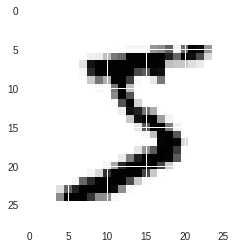

In [7]:
print (X_train.shape)

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

The shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. The shape of X_test is (10000, 28, 28).  As all the images are in grayscale, the number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B). The input shape that a CNN will need to be in a specific format. Tensorflow has format of  (batch, height, width, channels).

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

 Reshape our input.


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

We will need to do the hit encoding for Y_train and Y_test. In one-hot encoding the integer is converted to an array which contains only one ‘1’ and the rest elements are ‘0’.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [41]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Original Code
#from keras.layers import Activation
#model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))
# # # # # # # # # # # # # # # # # # # # # # # # # # # # 


CNN architecture has following steps.

*   Convolution
*   Activation
*   Batch Normalisation
*   Pooling
*   Repeat above three steps for adding more hidden layer

Our first layer, 64 is number of filters and (9, 9) is the size of the filter. We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.
The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function.

In [0]:
# Original Code
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Convolution2D(64, (11,11), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 18))
model.add(Flatten())
model.add(Activation('softmax'))





In [243]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 18, 18, 64)        7808      
_________________________________________________________________
batch_normalization_11 (Batc (None, 18, 18, 64)        256       
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 18, 18, 10)        650       
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 1, 1, 10)          32410     
_________________________________________________________________
flatten_52 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_65 (Activation)   (None, 10)                0         
Total params: 41,124
Trainable params: 40,996
Non-trainable params: 128
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [245]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.1230 - acc: 0.9625
Epoch 2/10
48256/60000 [=======================>......] - ETA: 4s - loss: 0.0547 - acc: 0.9835

60000/60000 [==============================] - 22s 374us/step - loss: 0.0543 - acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0389 - acc: 0.9875
Epoch 4/10
10080/60000 [====>.........................] - ETA: 19s - loss: 0.0267 - acc: 0.9917

60000/60000 [==============================] - 22s 367us/step - loss: 0.0295 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0244 - acc: 0.9919


Epoch 6/10
60000/60000 [==============================] - 22s 375us/step - loss: 0.0193 - acc: 0.9939
Epoch 7/10
48640/60000 [=======================>......] - ETA: 4s - loss: 0.0152 - acc: 0.9947

60000/60000 [==============================] - 22s 368us/step - loss: 0.0162 - acc: 0.9946
Epoch 8/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0146 - acc: 0.9950
Epoch 9/10
11136/60000 [====>.........................] - ETA: 17s - loss: 0.0080 - acc: 0.9977

60000/60000 [==============================] - 21s 357us/step - loss: 0.0105 - acc: 0.9965
Epoch 10/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.0100 - acc: 0.9963

60000/60000 [==============================] - 22s 373us/step - loss: 0.0099 - acc: 0.9963


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
# plot graph


In [247]:
print(score)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

[0.0503010831305161, 0.9883]
Saved model to disk


In [0]:
y_pred = model.predict(X_test)


In [249]:
print(y_pred[:9])
print(y_test[:9])

[[1.20431632e-17 1.67196986e-25 1.40480984e-13 2.39890979e-13
  1.13307659e-27 9.58596307e-22 5.95851669e-28 1.00000000e+00
  8.23245384e-18 2.63708091e-16]
 [9.23706878e-15 9.00856723e-10 1.00000000e+00 1.52332519e-13
  2.74579415e-16 1.77198758e-22 1.60837385e-11 1.14111584e-17
  1.22961949e-12 6.33374925e-18]
 [2.50129209e-13 9.99997258e-01 3.55107305e-10 1.67217573e-10
  1.93473554e-07 7.85070953e-10 1.71928585e-12 1.28209081e-06
  1.32297157e-06 5.47379364e-10]
 [9.99975920e-01 5.21998033e-18 4.45228125e-11 1.15900456e-10
  1.50975881e-11 1.62695433e-05 7.78165304e-06 3.90632451e-08
  3.10283882e-11 9.03591299e-11]
 [5.47355486e-15 7.32837348e-13 4.73020390e-19 7.69786779e-22
  1.00000000e+00 1.46545234e-15 1.68962890e-16 3.86140078e-12
  2.41739734e-13 3.22192442e-08]
 [3.51174905e-15 9.99949694e-01 9.25731930e-13 7.25654562e-12
  7.22438290e-06 1.19294121e-14 3.54941914e-15 4.15537143e-05
  1.55435259e-06 2.60429953e-08]
 [1.18870225e-24 9.39825661e-15 2.88481295e-14 1.22282481e

In [250]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_190': <keras.layers.convolutional.Conv2D object at 0x7f6790a90128>, 'batch_normalization_11': <keras.layers.normalization.BatchNormalization object at 0x7f6790a90048>, 'conv2d_191': <keras.layers.convolutional.Conv2D object at 0x7f6790a90748>, 'conv2d_192': <keras.layers.convolutional.Conv2D object at 0x7f6790b583c8>, 'flatten_52': <keras.layers.core.Flatten object at 0x7f678f523860>, 'activation_65': <keras.layers.core.Activation object at 0x7f678f455550>}


This is what a CNN learns from each layer. We can see that some filters have learnt to recognize edges, curves, etc.

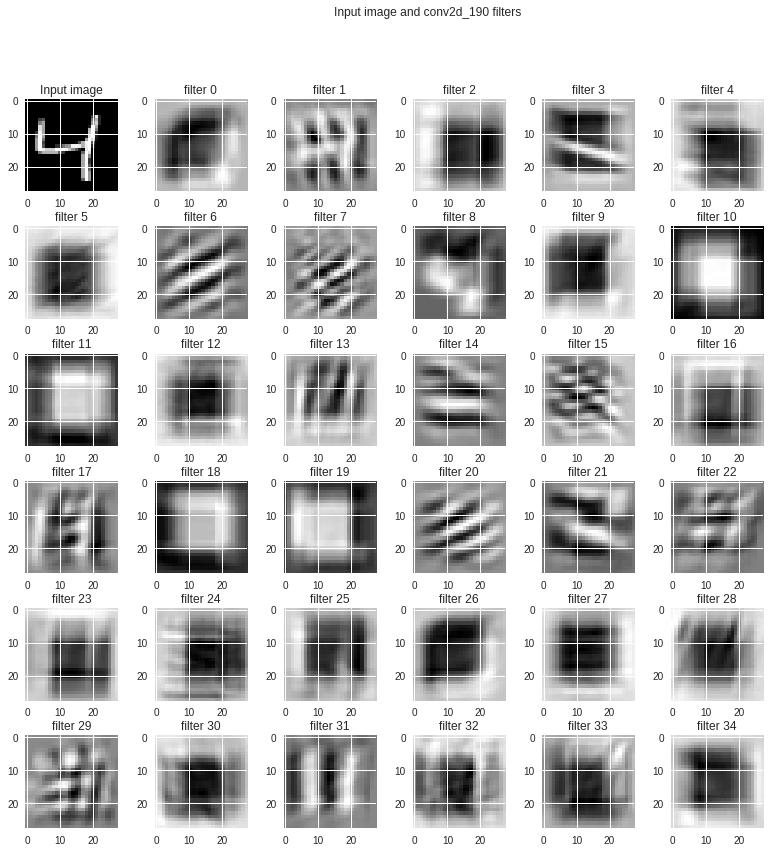

In [251]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_190'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()